In [7]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam


In [8]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to fit the CNN input format and normalize
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 42s 86ms/step - loss: 0.2305 - accuracy: 0.9334 - val_loss: 0.0628 - val_accuracy: 0.9806
Epoch 2/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0612 - accuracy: 0.9813 - val_loss: 0.0574 - val_accuracy: 0.9819
Epoch 3/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0437 - accuracy: 0.9867 - val_loss: 0.0438 - val_accuracy: 0.9867
Epoch 4/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0344 - val_accuracy: 0.9885
Epoch 5/10
469/469 [==============================] - 38s 82ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0299 - val_accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 38s 82ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0298 - val_accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0333 - val_accuracy:

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)


313/313 [==============================] - 4s 12ms/step - loss: 0.0271 - accuracy: 0.9912
Test Accuracy: 0.9911999702453613


In [12]:
# Define the callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model with callback
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), callbacks=[reduce_lr])


Epoch 1/10
469/469 [==============================] - 56s 119ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.0280 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 49s 105ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0337 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0328 - val_accuracy: 0.9909 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.0320 - val_accuracy: 0.9911 - lr: 0.0010
Epoch 5/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0289 - val_accuracy: 0.9929 - lr: 2.0000e-04
Epoch 6/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0288 - val_accuracy: 0.9930 - lr: 2.0000e-04
Epoch 7/10
469/469 [============================

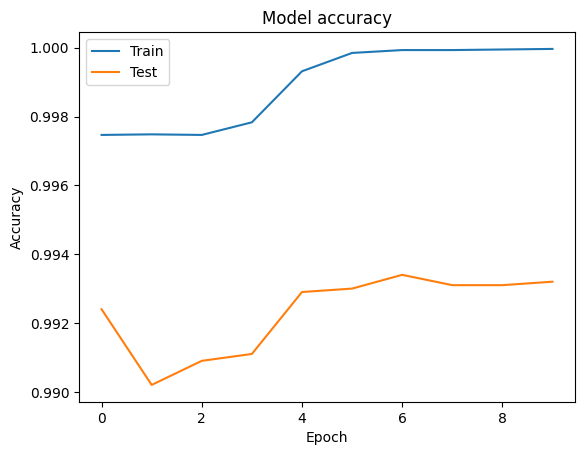

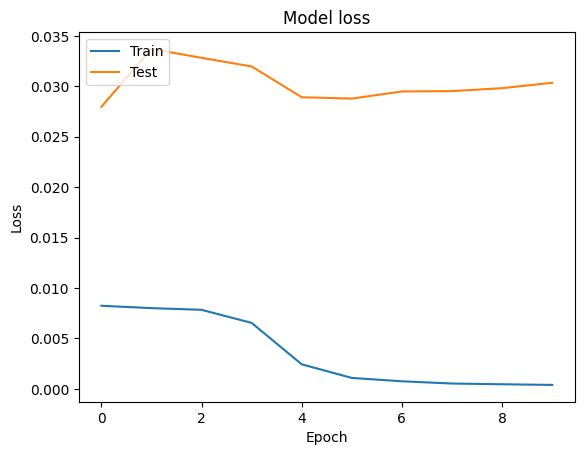

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
